# Analysis of Galaxy types

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import ipywidgets as widgets
import time

In [2]:
data = pd.read_excel("../data/galaxyData.xlsx")

In [3]:
data['u_g'] = data['modelmag_u'] - data['modelmag_g']
data['g_r'] = data['modelmag_g'] - data['modelmag_r']

In [4]:
#plt.scatter(x=data.u_g, y=data.g_r, s=1, rasterized=True)
#plt.xlim(0,3)
#plt.ylim(-1,3)
#plt.xlabel("u-g")
#plt.ylabel("g-r")
#x = np.array([-10,10])
#plt.plot(x, (-1)*x + 2.2, c='green')
#plt.title("Color-Color Graph")

### Caluculate how far back in time the galaxy is

In [5]:
data['timediff'] = data['d_hubble_mpc'] * 3.262*(10**6)

### Seperate ellipticals and spirals

In [6]:
data.loc[(data['u_g'] * (-1) + 2.2) > data['g_r'], 'isSpiral'] = 1
data.loc[(data['u_g'] * (-1) + 2.2) < data['g_r'], 'isSpiral'] = 0


In [7]:
maxtime = data.max().timediff
mintime = data.min().timediff
print(mintime)
print(maxtime)

size = 50
chunk = (maxtime-mintime)/size
percentList = []

for i in range(size):
    j = i + 1
    set = chunk * j + mintime
    tmp = data.loc[(data['timediff'] < set) & (data['timediff'] > set - chunk)]
    tmp = tmp['isSpiral'].value_counts()
    tmp = tmp.values.tolist()
    percentSpiral = tmp[0]/(tmp[0]+tmp[1])
    percentList.append(percentSpiral)

55952028.68753127
1114292222.021073


<IPython.core.display.Javascript object>


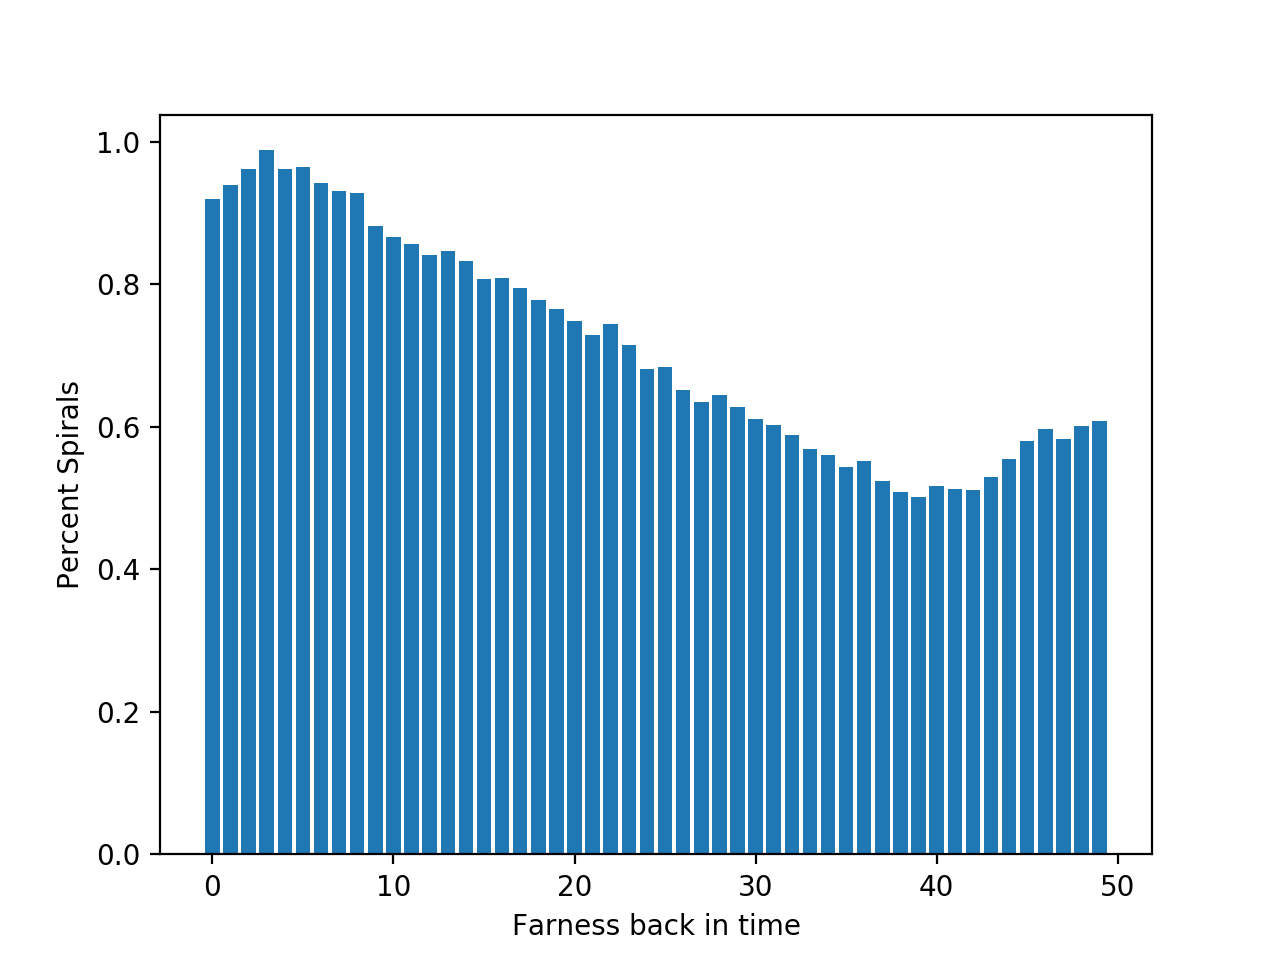

Text(0, 0.5, 'Percent Spirals')

In [8]:
xvals = []
for i in range(size):
    xvals.append(i)
plt.bar(xvals, percentList)
plt.xlabel("Farness back in time")
plt.ylabel("Percent Spirals")

### This is super weird because we would expect it to kind of act in the opposite way as it does here. My theory is that it is following the trend for a little while but soemthing has changes in the past ~1 billion years

<IPython.core.display.Javascript object>


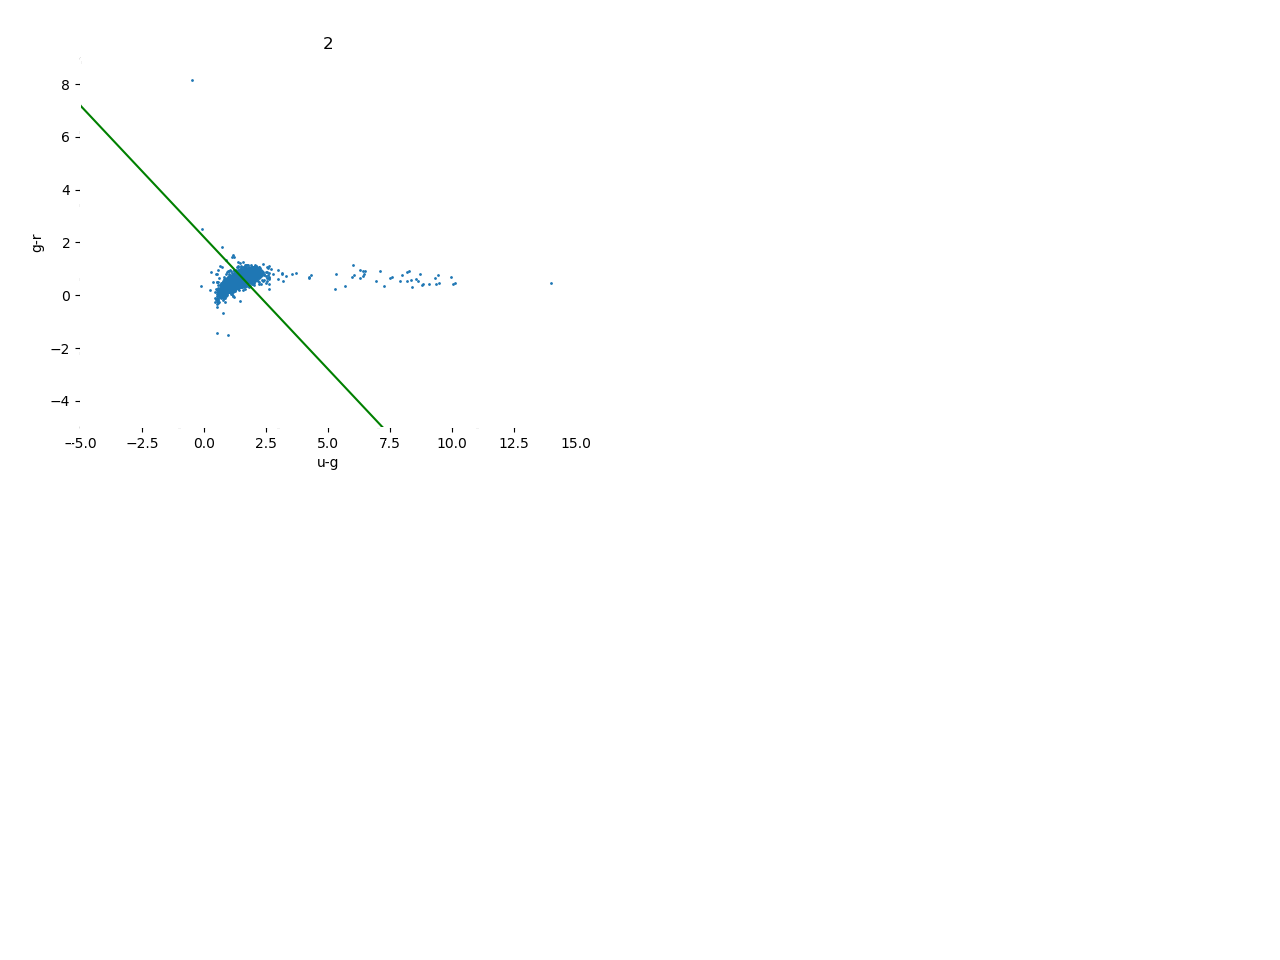

In [ ]:
size = 5
chunk = (maxtime-mintime)/size

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.ion()
fig.show()
fig.canvas.draw()

i = size - 1
#while i < size:
    
while True:
    
    if i == -1:
        i = size-1;
    
    
    ax.clear()
    
    j = i + 1
    set = chunk * j + mintime
    tmp = data.loc[(data['timediff'] < set) & (data['timediff'] > set - chunk)]
    
    
    ax.scatter(x=tmp.u_g, y=tmp.g_r, s=1, rasterized=True)
    plt.xlim(-5,15)
    plt.ylim(-5,9)
    plt.xlabel("u-g")
    plt.ylabel("g-r")
    x = np.array([-10,10])
    ax.plot(x, (-1)*x + 2.2, c='green')
    plt.title(i)
    fig.canvas.draw()
    time.sleep(1)
    
    i = i - 1